In [1]:
# Apply the dimensionality reduction algorithms to one of your datasets from assignment #1  
# and rerun your neural network learner on the newly projected data.

In [19]:
# https://www.youtube.com/watch?v=ikt0sny_ImY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.feature_selection import SelectPercentile
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
%matplotlib inline

In [20]:
#################### PCA Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
#X = cancer.data
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

#print "og shape: ", X.shape
#pca = PCA(n_components=10).fit(X)
#transformed_data = pca.transform(X)
#print "new shape: ", transformed_data.shape

###### HOLDOUT ########

# Holdout 20%
#X = cancer.data
#y = cancer.target
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


train accuracy:  [97.555012224938878, 100.0, 100.0, 99.26739926739927, 99.118942731277542, 100.0, 100.0, 100.0, 100.0]

cv accuracy:  [96.059814169570259, 97.00450450450451, 96.551808406647126, 96.348294106914793, 95.988142292490124, 94.430684554523552, 99.285714285714292, 96.500000000000014, 89.0]



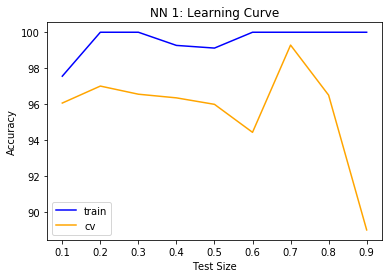

In [21]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('NN 1: Learning Curve')
plt.legend()

train accuracy:  [98.826979472140764, 98.826979472140764, 99.413489736070375, 99.413489736070375, 99.413489736070375, 99.413489736070375, 99.413489736070375]

cv accuracy:  [96.47644512350395, 97.065189712248539, 96.45912910618793, 96.165011459129104, 95.879297173414813, 95.879297173414813, 95.879297173414813]



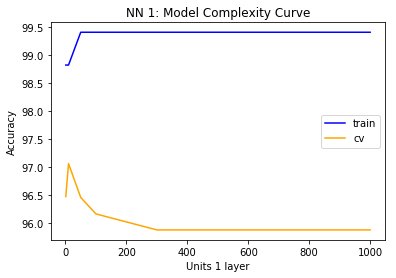

In [22]:
###### Model Complexity ########

# try units and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
units = [1, 10, 50, 100, 300, 500, 1000]
train_scores = []
test_scores = []
cv_scores = []
for unit in units:
    clf = MLPClassifier(hidden_layer_sizes=[unit],alpha=1.0, max_iter=3000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(units, train_scores, color='blue', label='train')
plt.plot(units, cv_scores, color='orange', label='cv')
plt.xlabel('Units 1 layer')
plt.ylabel('Accuracy')
plt.title('NN 1: Model Complexity Curve')
plt.legend()

In [23]:
##### Test Model On Holdout Group  #####

clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(sm.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.991
Accuracy on the test subset: 0.991
[[32  0]
 [ 1 81]]


In [7]:
def model_result(x_data, y_data):

    X, X_test_holdout, y, y_test_holdout = train_test_split(x_data, y_data, test_size=0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
    clf.fit(X, y)
    y_pred = clf.predict(X_test_holdout)

    train_score = clf.score(X, y)
    test_score = clf.score(X_test_holdout, y_test_holdout)
    cm = sm.confusion_matrix(y_test_holdout, y_pred)
    return train_score, test_score, cm

def get_fresh_data():
    cancer = load_breast_cancer()
    X = scale(cancer.data)
    y = pd.DataFrame(cancer.target)
    y = y.values.flatten()
    return X,y
    


In [8]:
#################### Kmeans PCA Breastcancer ###############################

X,y = get_fresh_data()

pca = PCA(n_components=10).fit(X)
transformed_data = pca.transform(X)

train_scores = []
test_scores = []
for x in range(0,9):
    train_score, test_score, cm = model_result(transformed_data,y)
    train_scores.append(train_score) 
    test_scores.append(test_score)
    if x == 8:
        print cm
    
print np.mean(train_scores)
print np.mean(test_scores)

[[46  1]
 [ 0 67]]
0.991697191697
0.971734892788


In [9]:
#################### Kmeans ICA Breastcancer ###############################

X,y = get_fresh_data()

ica = FastICA(n_components=10).fit(X)
transformed_data = ica.transform(X)

train_scores = []
test_scores = []
for x in range(0,9):
    train_score, test_score, cm = model_result(transformed_data,y)
    train_scores.append(train_score) 
    test_scores.append(test_score)
    if x == 8:
        print cm
    
print np.mean(train_scores)
print np.mean(test_scores)

[[41  2]
 [ 0 71]]
0.9663003663
0.950292397661


In [10]:
#################### Kmeans RandomProj Breastcancer ###############################

X,y = get_fresh_data()

sp = SparseRandomProjection(n_components = 10)
transformed_data = sp.fit_transform(X)

train_scores = []
test_scores = []
for x in range(0,9):
    train_score, test_score, cm = model_result(transformed_data,y)
    train_scores.append(train_score) 
    test_scores.append(test_score)
    if x == 8:
        print cm
    
print np.mean(train_scores)
print np.mean(test_scores)

[[43  4]
 [ 0 67]]
0.98315018315
0.975633528265


In [11]:
#################### Univariate Breastcancer ###############################

X,y = get_fresh_data()

select = SelectPercentile(percentile=33)
select.fit(X, y)
transformed_data = select.transform(X)

train_scores = []
test_scores = []
for x in range(0,9):
    train_score, test_score, cm = model_result(transformed_data,y)
    train_scores.append(train_score) 
    test_scores.append(test_score)
    if x == 8:
        print cm
    
print np.mean(train_scores)
print np.mean(test_scores)

[[42  4]
 [ 3 65]]
0.962881562882
0.958089668616
